# Lecture 6: Intro to Pandas Continued

In [2]:
# import pandas using the alias pd
import pandas as pd
import numpy as np

Unlike in lecture 5, pandas is not automatically installed into this lecture. <br><br>
We can install the python package into our environment using the terminal or by using the "!" operator to have a code cell run terminal code.

In [3]:
# install pandas using the command "!pip install pandas" in this cell
%pip install pandas
%pip install numpy


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Load bioreactor and spectrophotometer data from the 'data' folder

In [4]:
# define varibles to store the information in the csv files 
bioreactor_df = pd.read_csv('bioreactor.csv')
spectrophotometer_df = pd.read_csv('spectrophotometer.csv')

In [5]:
# print the first 5 rows of the bioreactor_df dataframe
print(bioreactor_df.head())

   Time (hours)        pH  Temperature (C)
0           0.0  6.964045        37.149119
1           0.5  6.918685        37.663193
2           1.0  6.827372        36.652716
3           1.5  7.017743        36.925183
4           2.0  6.959822        36.782423


In [8]:
# print the first 5 rows of the bioreactor_df dataframe
print(spectrophotometer_df.head())

   Time (hours)        OD       g/L
0             0  5.882026  1.999889
1             1  5.489369  1.866385
2             2  5.933779  2.017485
3             3  5.475044  1.861515
4             4  4.948391  1.682453


### Convert OD to grams / liter
OD = optical density. These units are arbitrary, but correlate grams per liter. Assume 1 OD = 0.34 g/L

In [7]:
# add a columm called g/L with converted biomass values
spectrophotometer_df['g/L'] = spectrophotometer_df['OD'] * 0.34

### Merging dataframes
note: we can avoid the warning by changing the dtype of the series 'Time (hours)' to float64 using .astype() function

In [14]:
# merge the dataframes using only the common time points called merged_df
spectrophotometer_df['Time (hours)'] = spectrophotometer_df['Time (hours)'].astype(np.float64)
bioreactor_df['Time (hours)'] = bioreactor_df['Time (hours)'].astype(np.float64)
merged_df = pd.merge(spectrophotometer_df, bioreactor_df, on='Time (hours)')
print(merged_df.head())

   Time (hours)        OD       g/L        pH  Temperature (C)
0           0.0  5.882026  1.999889  6.964045        37.149119
1           1.0  5.489369  1.866385  6.827372        36.652716
2           2.0  5.933779  2.017485  6.959822        36.782423
3           3.0  5.475044  1.861515  7.046278        37.336147
4           4.0  4.948391  1.682453  7.005195        36.615042


In [19]:
# merge the dataframes using all the time points called merged_all_df
merged_all_df = pd.merge(spectrophotometer_df, bioreactor_df, on='Time (hours)', how='outer')
print(merged_all_df.head())
copy_merged_all_df = merged_all_df.copy()

   Time (hours)        OD       g/L        pH  Temperature (C)
0           0.0  5.882026  1.999889  6.964045        37.149119
1           0.5       NaN       NaN  6.918685        37.663193
2           1.0  5.489369  1.866385  6.827372        36.652716
3           1.5       NaN       NaN  7.017743        36.925183
4           2.0  5.933779  2.017485  6.959822        36.782423


## Handling NaN values in a dataframe
There are several strategies you can use to deal with NaN (Not a Number) values in a pandas DataFrame.
- fill with a specific value
- forward fill 
- backward fill
- interpolate
- drop rows that have NaN values

### Fill with a Specific Value (fillna)
You can fill NaN values with a specific value like 0, a mean, or any other number. This approach is straightforward but can potentially skew your data analysis.

In [ ]:
# fill in the missing values with the number zero using the fillna() method
merged_all_fillna_df = merged_all_df.fillna(0)
print(merged_all_fillna_df.head())

   Time (hours)        OD       g/L        pH  Temperature (C)
0           0.0  5.882026  1.999889  6.964045        37.149119
1           0.5  0.000000  0.000000  6.918685        37.663193
2           1.0  5.489369  1.866385  6.827372        36.652716
3           1.5  0.000000  0.000000  7.017743        36.925183
4           2.0  5.933779  2.017485  6.959822        36.782423


### Forward Fill (ffill)
Forward fill propagates the last valid value forward to fill the NaN values. This method is particularly useful in time series data where the next valid observation is likely to be similar to the last one.

In [ ]:
# use forward fill to fill in the missing values using the ffill() method
merged_all_ffill_df = copy_merged_all_df.ffill()
print(merged_all_ffill_df.head())

   Time (hours)        OD       g/L        pH  Temperature (C)
0           0.0  5.882026  1.999889  6.964045        37.149119
1           0.5  5.882026  1.999889  6.918685        37.663193
2           1.0  5.489369  1.866385  6.827372        36.652716
3           1.5  5.489369  1.866385  7.017743        36.925183
4           2.0  5.933779  2.017485  6.959822        36.782423


### Backward Fill (bfill)
Backward fill is the opposite of forward fill. It propagates the next valid value backwards to fill NaN values.

In [22]:
#  use backward fill to fill in the missing values using the bfill() method
merged_all_bfill_df = copy_merged_all_df.bfill()
print(merged_all_bfill_df.head())

   Time (hours)        OD       g/L        pH  Temperature (C)
0           0.0  5.882026  1.999889  6.964045        37.149119
1           0.5  5.489369  1.866385  6.918685        37.663193
2           1.0  5.489369  1.866385  6.827372        36.652716
3           1.5  5.933779  2.017485  7.017743        36.925183
4           2.0  5.933779  2.017485  6.959822        36.782423


### Interpolation
Interpolation is a method that estimates missing values by interpolating the values based on surrounding data points. This can be linear or more complex based on the data.



In [23]:
# use the interpolate() method to fill in the missing values
merged_all_interpolate_df = copy_merged_all_df.interpolate()
print(merged_all_interpolate_df.head())

   Time (hours)        OD       g/L        pH  Temperature (C)
0           0.0  5.882026  1.999889  6.964045        37.149119
1           0.5  5.685697  1.933137  6.918685        37.663193
2           1.0  5.489369  1.866385  6.827372        36.652716
3           1.5  5.711574  1.941935  7.017743        36.925183
4           2.0  5.933779  2.017485  6.959822        36.782423


### Drop Missing Values
Sometimes, if the missing data is not significant, you might choose to simply drop the rows with NaN values. However, this can result in a loss of data.

In [24]:
# use the dropna() method to drop all the rows with missing values
merged_all_dropna_df = copy_merged_all_df.dropna()
print(merged_all_dropna_df.head())

   Time (hours)        OD       g/L        pH  Temperature (C)
0           0.0  5.882026  1.999889  6.964045        37.149119
2           1.0  5.489369  1.866385  6.827372        36.652716
4           2.0  5.933779  2.017485  6.959822        36.782423
6           3.0  5.475044  1.861515  7.046278        37.336147
8           4.0  4.948391  1.682453  7.005195        36.615042


## Data Visualization Introduction
Note we will have to install the python package matplotlib using the command '!pip install matplotlib'

In [ ]:
# install matplotlib using the command '!pip install matplotlib'
%pip install matplotlib
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 22.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 29.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Line plot from dataframe
```python
df.plot(x='column name', y=['line 1 column name', 'line 2 column name', 'line 3 column name',...])
```

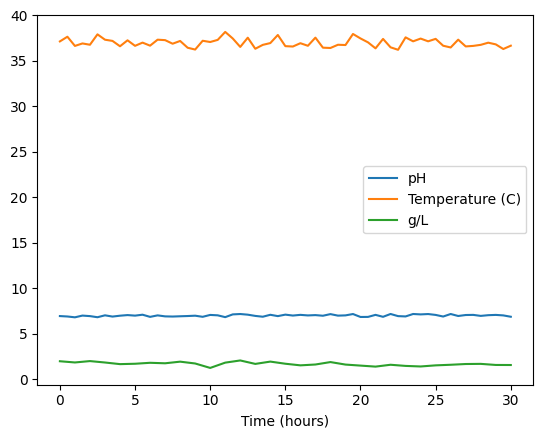

In [ ]:
# make a line plot of the pH, temperature, and g/L biomass over time
merged_all_interpolate_line_plot = merged_all_interpolate_df.plot(x='Time (hours)', y=['pH', 'Temperature (C)', 'g/L'], kind='line')

### Scatter plot from dataframe
```python
ax = df.plot.scatter(x='column_name_x', y='line_1_column_name', color='Red')
df.plot.scatter(x='column_name_x', y='line_2_column_name', color='Blue', ax=ax)
```

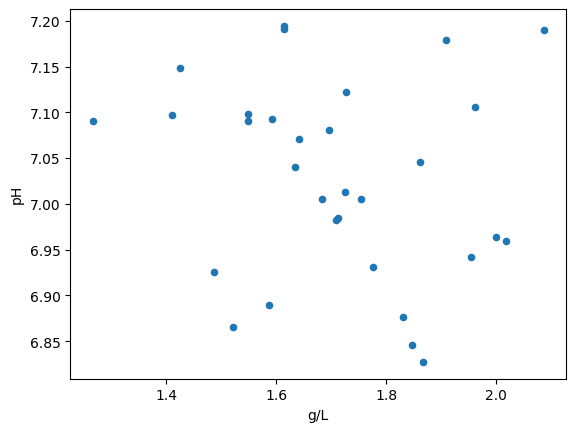

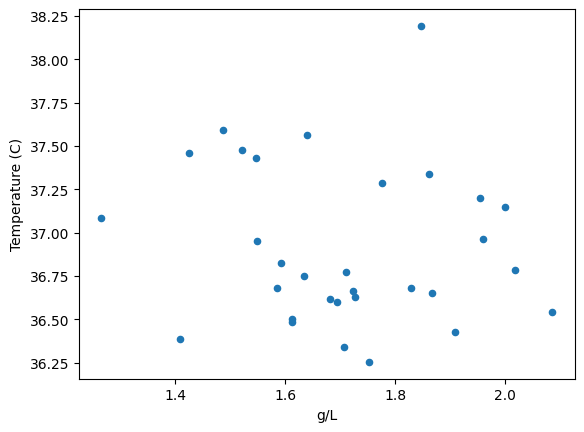

In [39]:
# make a scatter plot with biomass on the x-axis with pH and temperature on the y-axis
merged_all_dropna_scatter = merged_all_dropna_df.plot.scatter(x='g/L', y='pH')
merged_all_dropna_scatter = merged_all_dropna_df.plot.scatter(x='g/L', y='Temperature (C)')

### Histogram from a pandas series
```python
df['column name'].plot.hist()
```

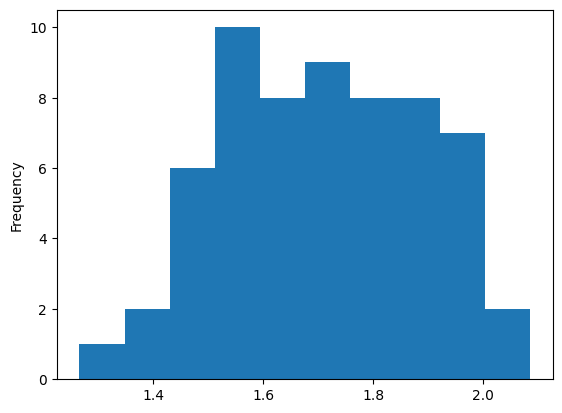

In [40]:
# make a histogram of all the values in the g/L biomass column
merged_all_interpolate_hist = merged_all_interpolate_df['g/L'].plot.hist()

### Box plot from series
```python
df['column name'].plot.box()
```

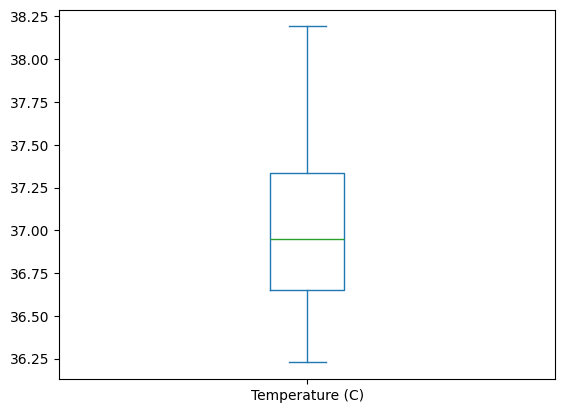

In [42]:
# make a boxplot of the all the values in the temperature column
merged_all_interpolate_box = merged_all_interpolate_df['Temperature (C)'].plot.box()

### Additional Resources

[Dataframe plotting documentation](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.html)